# Practical Lab 3

In this lab, we will focus more on using machine learning models to solve mock real-world problems. Scikit-learn is often the go-to library for using traditional statistical machine learning models. Scikit learn provides a  collection of data pre-processing and machine learning models that can seamlessly be integrated with other Python packages.  

In the previous practical lab, we described the libraries Numpy, Pandas, and Matplotlib, which are useful for loading, transforming, and plotting data.   

At the end of this lab, you should be more familiar with searching for documentation for library functions online, using linear and logistic regression function with Scikit-learn to solve a given problem and identify when to use which model. You should also be even more familiar with the libraries Numpy, Matplotlib, and Pandas and how you use these libraries in conjunction.

This lab will deal with:  
- How to use and train a linear regression model
- How to use and train a logistic regression model.
- Some approaches on how you can investigate a new dataset, its most important features, distribution, etc.  
- How to create a predictive model to predict the class or label of new unseen data.
- Metrics and visualization methods for evaluating a trained predictive model.

## Machine learning   

Scikit-learn is a (near) all-encompassing python library for machine learning.  
When we talk about machine learning, it is crucial to distinguish between the types of problems we are trying to solve. By grouping and categorizing the kinds of problems we are trying to solve, we can identify commonalities between them and develop methods for solving similar tasks.

<br>  

**Having good data is essential** for all machine learning models. If the data is incorrect, unfiltered, missing values, and so forth, then the model built from that data will perform poorly! The adage goes, "Garbage in, garbage out."


Below is a simplified image of how different tasks are grouped for machine learning
<br>
<br>

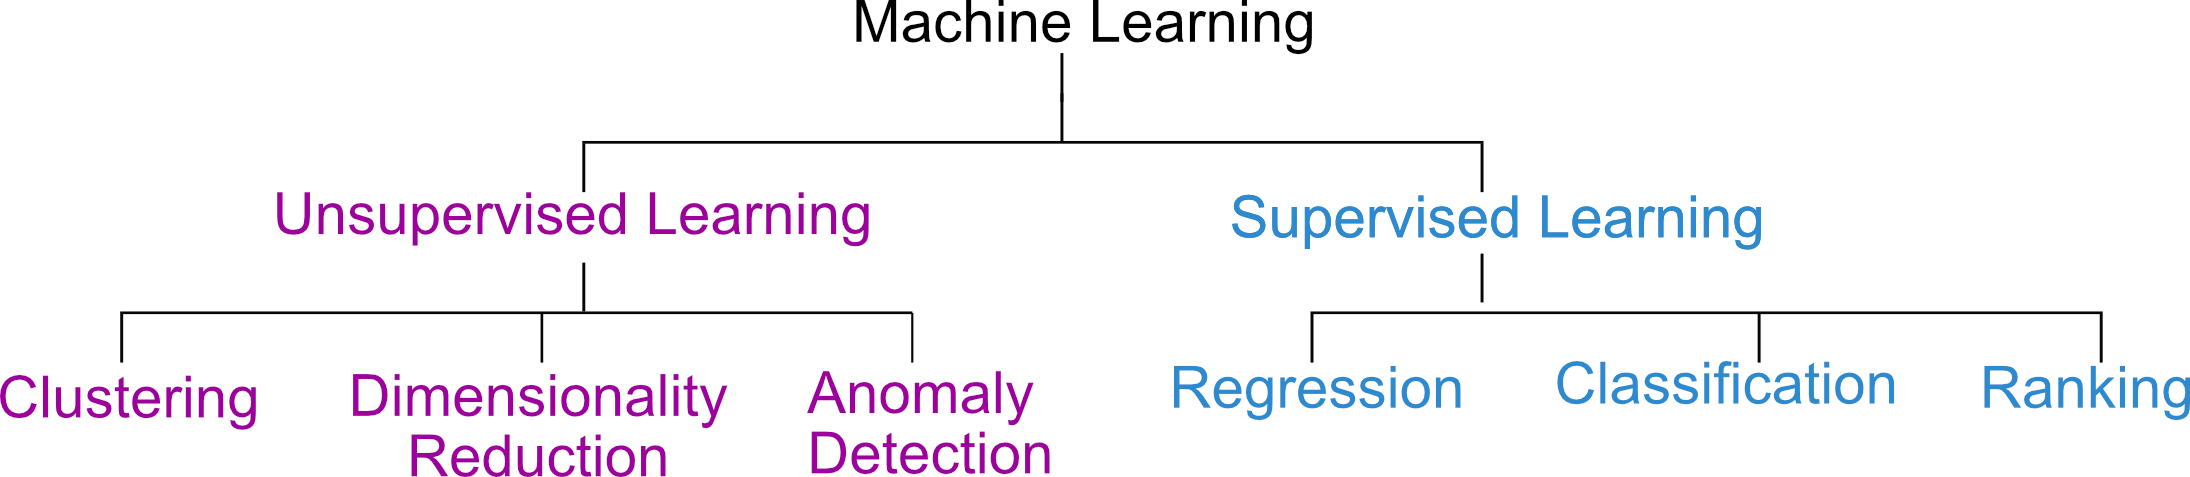

### Regression vs Classification   
In this lab, we will mainly deal with supervised learning tasks.
This means that we have data with a corresponding label. A supervised model aims to extract features for the data and learn to predict the labels on unseen data as accurately as possible.  
  
In regression and classification tasks, the goal is to find a function, $f(X)$, which is the most likely to have generated the data we observe. 
The major difference between a regression and classification task is:  

<br>  

1. `For regression`, the label for the data is some number and is continuous. It may range from anywhere between $-\infty$ to $\infty$. It can take any value on the real number line.   

    **Example tasks**:   
    - Predicting house prices based on location and other factors.    
    - Predicting the bpm for a song based on its features.     
2. `For classification`, the label is some category, class, or other groupings. Based on which features the data has, one wishes to group/classify the data's correct type. 
    **Example tasks**:   
    - Predicting cancer cells for images of skin lesions   
    - Predicting if the video feed for a self-driving car is your side of the road or not.
    - Predicting the most likely score of movies, based on what you previously have liked. 

<br/>
<br/>


# a) Regression Task

## House Prices
This section will describe a linear regression task by looking at a common dataset, called the Boston housing dataset. Our goal is to predict what the price of any house would be given certain attributes but to do that, it is a good starting point to first inspect the data!

In [15]:
from sklearn import datasets
from sklearn.datasets  import fetch_california_housing

california  = fetch_california_housing()
print("Columns of the dataset:\n", california.keys())

print("\nShape of the data", california.data.shape)
print("Number of examples", california.target.shape)

Columns of the dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Shape of the data (20640, 8)
Number of examples (20640,)


In [16]:
print("\nShape of the data", california.feature_names)


Shape of the data ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


For the Scikit-learn datasets, we can read more about a particular dataset by printing its description:

In [17]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<br/>  
<br/>   
We can visually inspect the dataset to get a sense of it.  
<br/>
<br/>


Text(0, 0.5, 'Count')

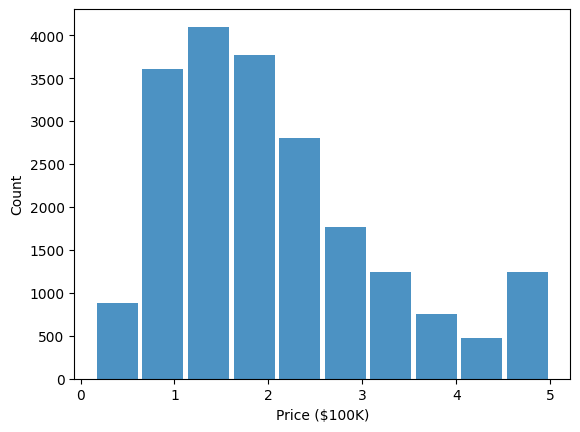

In [18]:
import matplotlib.pyplot as plt

plt.hist(california.target, bins=10, rwidth=0.9, alpha=0.8)
plt.xlabel("Price ($100K)")
plt.ylabel("Count")

Once we have gained better oversight of the data, we will want to fit a linear regression model on the data. Once we have generated our predictive model, we can use it to make predictions of what new housing prices are likely to be.

#### ASSIGNMENT a)

**a)** Look up the documentation for importing a linear regression model from `Scikit-learn`.    
**b)** Use it to train a linear regression model on the Boston house prices dataset.  
**c)** Use the trained regression model on the dataset to predict what the housing prices should be from the original dataset. Is it accurate?    
**d)** Plot the prediction your model made against the true labels with a scatter plot.

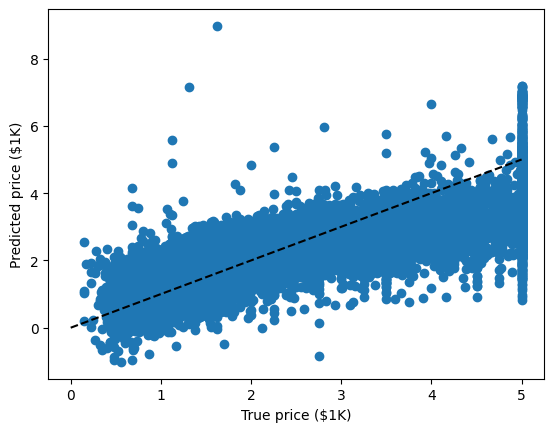

0.606232685199805


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

price = fetch_california_housing()

# YOUR CODE HERE
model = LinearRegression()
X = price.data
y = price.target

model.fit(X, y)
ypred = model.predict(X)
# Code provided by us to compare the generated predictions against the actual values
xlim = [0, 5]
ylim = [0, 5]
plt.plot(xlim, ylim, '--k')
plt.scatter(y,ypred)
plt.xlabel("True price ($1K)")
plt.ylabel("Predicted price ($1K)")
plt.show()

print(model.score(X,y))# About 60% accurate

### Train-Test split

In the above example, you saw how you could create a predictive model to fit all of the data. However, this approach has a problem: If your model overfits the data, you have no way of knowing since the model has been trained to work the best for that dataset. 

Instead, we split the data into a training and testing dataset or even a train, test, and validation dataset. This way, we can use the training dataset for training the model and use the leftover unseen data (test set) to evaluate how well our model performs on new data. A naive way would be to split it based on indexing, say the first 80 samples are training data, and the test is testing. But, there is a high likelihood that samples next to each other were collected with high correlation.  Maybe a dataset is measurements of temperatures taken every week. If we split based on indexing, our model might only train on temperatures for spring and summer!  

Therefore, a better method is to chose which data points are in the training and testing set randomly. This approach is sometimes called a train-test split - and when splitting the data, the training dataset should contain more samples than the testing set since ML models require a lot of data to be trained well.

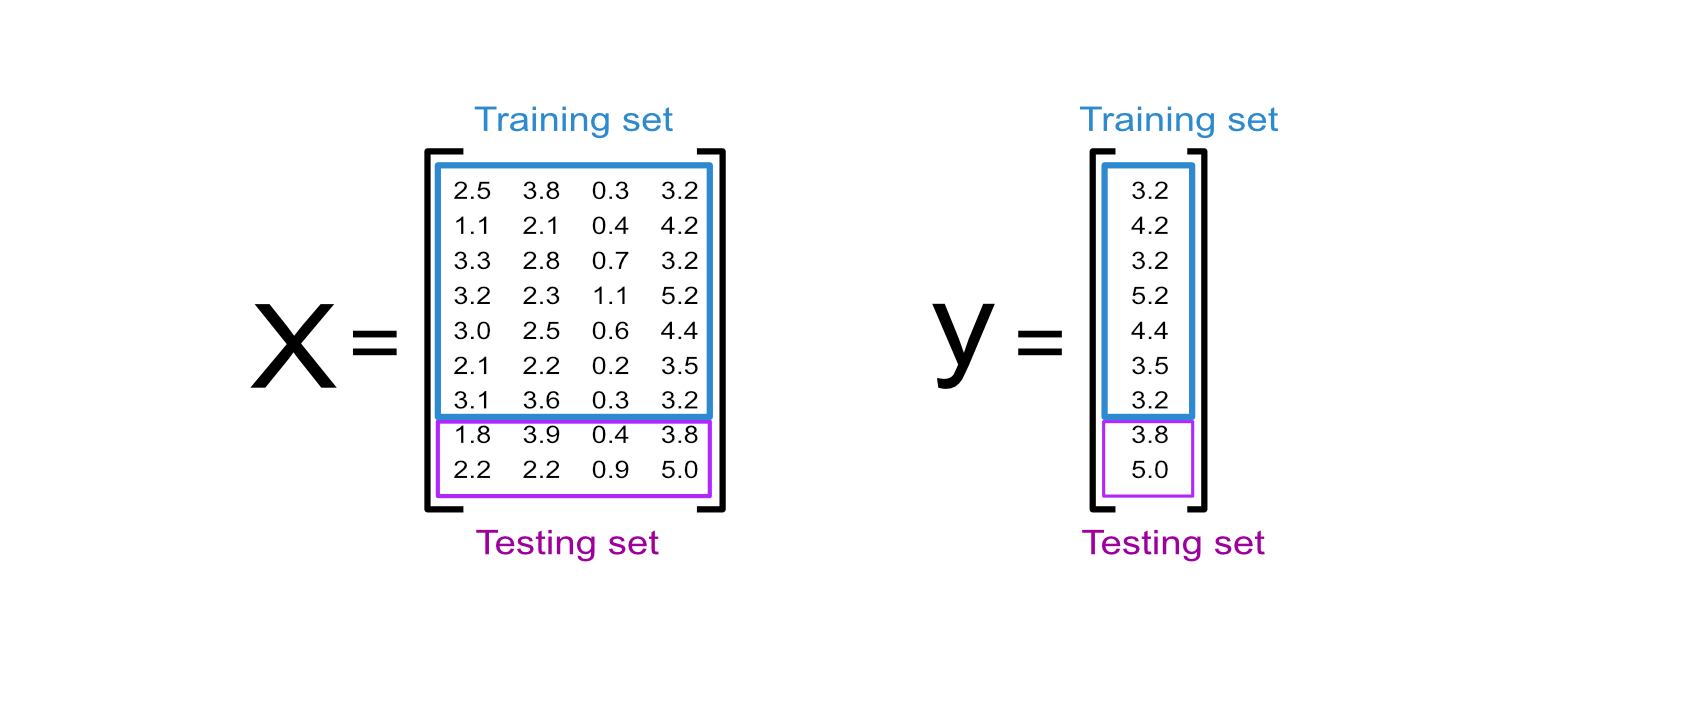

#### ASSIGNMENT b)
**a)** Train a Linear Regression model again, but this time split the dataset into a training and testing dataset. Either of these splits is allowed. The first number indicates the percentage of the whole data that is in the training set, and the other, the percentage of data in the testing set:  

- (70/30)
- (75/25)
- (80/20)
- (85/15)
- (90,10)

**b)** Use a Linear Regression model and make predictions on the `test dataset`, data which the model has not trained on. Save the predicted labels genereated for the model in a variable named $y_{pred}$.

**c)** Create the same scatter plot between the predicted target, $y_{pred}$ and the actual target, $y_{test}$ as you did before in the previous section of the assignment. This plot will illustrate how close your predictive model is with its predictions compared to the actual labels.

**d)** Create a title for your plot stating how you chose to split the training and testing data. The plot's title should also display the _coefficient of determination_ $R^2$ - i.e., how well the model's predicted labels compares to the true labels.      
Example of how the title of the plot may look like:     

> "Housing Prices, split (80/20) - R2: 0.71"

**(optional)**: Test different training and testing splits. How does the _coefficient of determination_ for your predictive model change? 

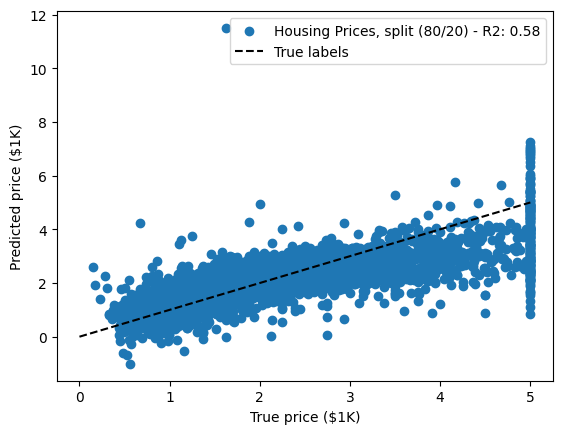

In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets  import fetch_california_housing
california = fetch_california_housing()

# YOUR CODE HERE
#
model = LinearRegression()
X = price.data
y = price.target
splitsize = 0.8
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=splitsize,random_state=42)
split = f"split ({splitsize*100:.0f}/{100-splitsize*100:.0f})"

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)

# CODE PROVIDED TO COMPARE YOUR RESULTS AGAINST THE ACTUAL LABELS
xlim = [0, 5]
ylim = [0, 5]

plt.scatter(y_test,y_pred, label=f"Housing Prices, {split} - R2: {r2:.2f}")

plt.plot(xlim, ylim, '--k', label=f"True labels")
plt.xlabel("True price ($1K)")
plt.ylabel("Predicted price ($1K)")
plt.legend()
plt.show()

This type of visual measurement is a quick and effective way to verifying that the trained model behaves as expected. However, to compare several different models, we need a more robust and mathematical precise measure. We will discuss some of those methods in the next section. 

<br/>
<br/>

# b) Classification task

### The iris dataset
A commonly used dataset for testing classification algorithms is the so-called "Iris dataset." It consists of measurements from three different types of Irises:  
a) Iris-Setosa   
b) iris-Versicolor   
c) Iris-Virginica    

From these are measured features of the different flowers, such as:    

- sepal length (cm)
- sepal width (cm)
- petal length (cm)
-petal width (cm)



Based on the features of these different flowers (measurements), we want to predict which is the most likely Isis (types of flowers) given these measurements?

In [21]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

# We can view the columns of this dataset
print("Iris dataset columns: \n", iris.keys())

# View the features for the dataset
iris_features = iris['feature_names']
print("\nThe Iris dataset features, ", len(iris_features), ":\n", iris_features)

Iris dataset columns: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The Iris dataset features,  4 :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<br/>
<br/>
Each sample will also have a target. In this case, the class (types of Irises) the sample belongs to. 

In [22]:
iris_targets = iris.target
iris_classes = list(set(iris_targets)) # Get only the unique targets
iris_target_names = ["Setosa", "Versicolor", "Virginica"]

print("Iris targets and names:\n" + 20*"_" + "\n")
for i, name in zip(iris_classes, iris_target_names):
    print(f"{i}: Iris-{name}")

Iris targets and names:
____________________

0: Iris-Setosa
1: Iris-Versicolor
2: Iris-Virginica


In [23]:
print("Example from the Iris dataset:\n Sample =",iris['data'][0])
print("\nThis dataset has {} features".format(len(iris['data'][0])))

Example from the Iris dataset:
 Sample = [5.1 3.5 1.4 0.2]

This dataset has 4 features


In [24]:
nr_samples, nr_features = iris.data.shape
print("Number of samples:", nr_samples)
print("Number of features:", nr_features)

Number of samples: 150
Number of features: 4


<br/>
<br/>
As we can see, each measurement (feature) of the data adds additional dimensions. To investigate the types of differences between the datasets, we may want to examine if we can see clear distinctions between them based on their features. However, since there are four features, we either need to choose between two attributes and compare them or reduce the dimensions (features) down to something we can more easily visualize. The latter is a collection of dimensionality reduction methods and will be described in an upcoming lab.

We can visualize one or two features simultaneously via a scatterplot, histogram, or similar methods.

#### Assignment c) 

a) Plot a histogram for each of the features of the Iris dataset - i.e., four histograms   
b) Determine the feature that could best categorize the type of Iris. How can you find which part is the most suitable for it?

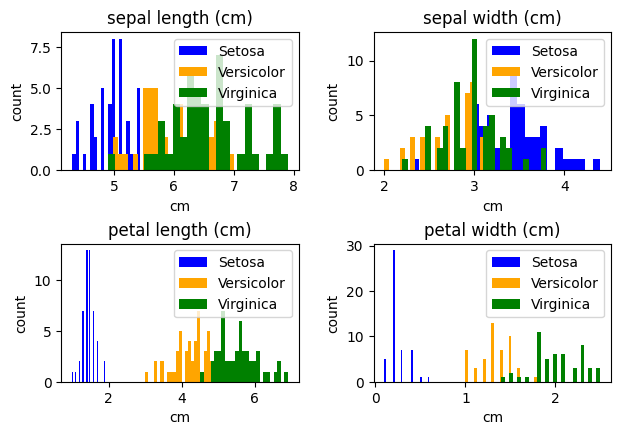

In [25]:
import matplotlib.pyplot as plt
iris_target_names = ["Setosa", "Versicolor", "Virginica"]

# YOUR CODE HERE
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
sepal_lengths = [[], [], []]  # sepal_lengths[0] for setosa, sepal_lengths[1] for versicolor, sepal_lengths[2] for virginica
sepal_widths = [[], [], []]
petal_lengths = [[], [], []]
petal_widths = [[], [], []]

for i in range(len(iris.target)):
    if iris.target[i] == 0:
        sepal_lengths[0].append(iris.data[i, 0])
        sepal_widths[0].append(iris.data[i, 1])
        petal_lengths[0].append(iris.data[i, 2])
        petal_widths[0].append(iris.data[i, 3])
    elif iris.target[i] == 1:
        sepal_lengths[1].append(iris.data[i, 0])
        sepal_widths[1].append(iris.data[i, 1])
        petal_lengths[1].append(iris.data[i, 2])
        petal_widths[1].append(iris.data[i, 3])
    elif iris.target[i] == 2:
        sepal_lengths[2].append(iris.data[i, 0])
        sepal_widths[2].append(iris.data[i, 1])
        petal_lengths[2].append(iris.data[i, 2])
        petal_widths[2].append(iris.data[i, 3])

bins = 25 # magic number

fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.hist(sepal_lengths[0],bins=bins,color="blue",label=iris_target_names[0])
ax1.hist(sepal_lengths[1],bins=bins,color="orange",label=iris_target_names[1])
ax1.hist(sepal_lengths[2],bins=bins,color="green",label=iris_target_names[2])
ax1.set_xlabel('cm')
ax1.set_ylabel('count')
ax1.set_title(features[0])
ax1.legend()

ax2 = fig.add_subplot(2,2,2)
ax2.hist(sepal_widths[0],bins=bins,color="blue",label=iris_target_names[0])
ax2.hist(sepal_widths[1],bins=bins,color="orange",label=iris_target_names[1])
ax2.hist(sepal_widths[2],bins=bins,color="green",label=iris_target_names[2])
ax2.set_xlabel('cm')
ax2.set_ylabel('count')
ax2.set_title(features[1])
ax2.legend()

ax3 = fig.add_subplot(2,2,3)
ax3.hist(petal_lengths[0],bins=bins,color="blue",label=iris_target_names[0])
ax3.hist(petal_lengths[1],bins=bins,color="orange",label=iris_target_names[1])
ax3.hist(petal_lengths[2],bins=bins,color="green",label=iris_target_names[2])
ax3.set_xlabel('cm')
ax3.set_ylabel('count')
ax3.set_title(features[2])
ax3.legend()

ax4 = fig.add_subplot(2,2,4)
ax4.hist(petal_widths[0],bins=bins,color="blue",label=iris_target_names[0])
ax4.hist(petal_widths[1],bins=bins,color="orange",label=iris_target_names[1])
ax4.hist(petal_widths[2],bins=bins,color="green",label=iris_target_names[2])
ax4.set_xlabel('cm')
ax4.set_ylabel('count')
ax4.set_title(features[3])
ax4.legend()

fig.tight_layout()
fig.subplots_adjust(top=0.85)

plt.show()

# YOUR ANSWER FOR THE BEST FEATURE (IN YOUR OPINION) BY NAME HERE: 
# petal length seems to have the most distinct clusters of data, 
# and also has the largest range of values, therefore I think it is the best feature.

<br/>
<br/>
From the histogram, you likely found one or possibly more features that you thought can best describe/separate the data. To achieve an even better separation between the labels, we can use additional features.   


#### Assignment d)
We now want to create a scatter plot using the two most important features to best separate the Iris dataset into its distinct groups based on the type of Iris. Your task is to:  

- Create a scatter plot between different features and find the two you think are the best at separating data into distinct groups.  
- Present your result below by labeling the Iris type by name and which color is assigned in the plot.
- The plot should look something like this, but you may find better slits: 
- (Optional) if you feel comfortable with Python, you are allowed to use other plotting libraries to solve this task if you find it more convenient.

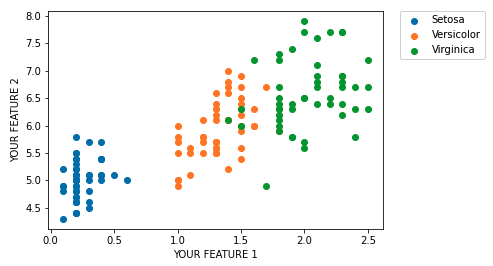

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


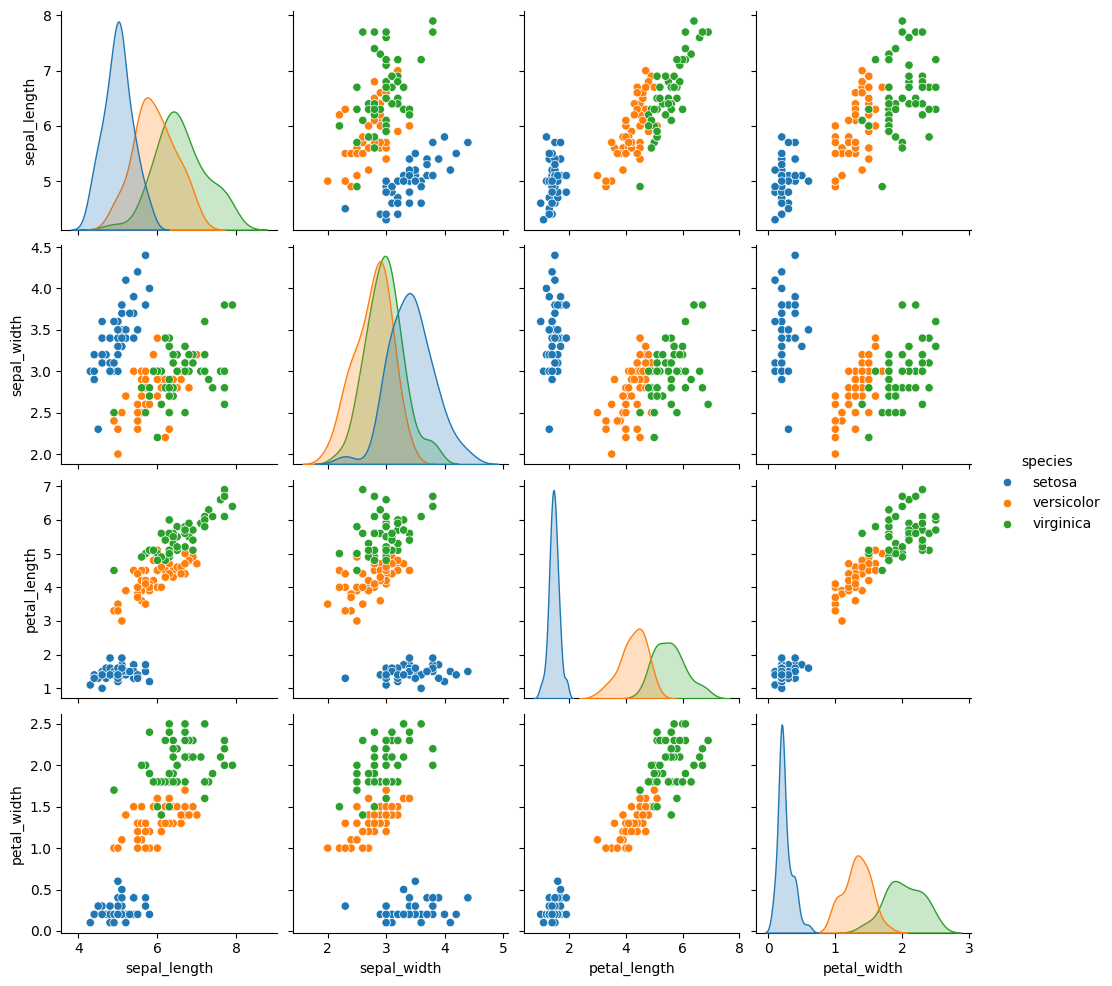

In [26]:
# YOUR CODE HERE
df = sns.load_dataset("iris")
sns.pairplot(df,hue='species')

# Looking at the pairplot, it seems that sepal width 
# and petal length combined provide the best separation by species
# since they give the tightest clustering, and with decent crossing
# over 
 

#### ASSIGNMENT e)

- Plot the correlation plot between all the different features.
- In WRITING also explain BRIEFLY what a correlation plot means
- Do the correlation plot's results match what you found to be the best features for separating the data into labels?
- **Hint**: You may want to convert the data into a DataFrame to more easily make a correlation plot

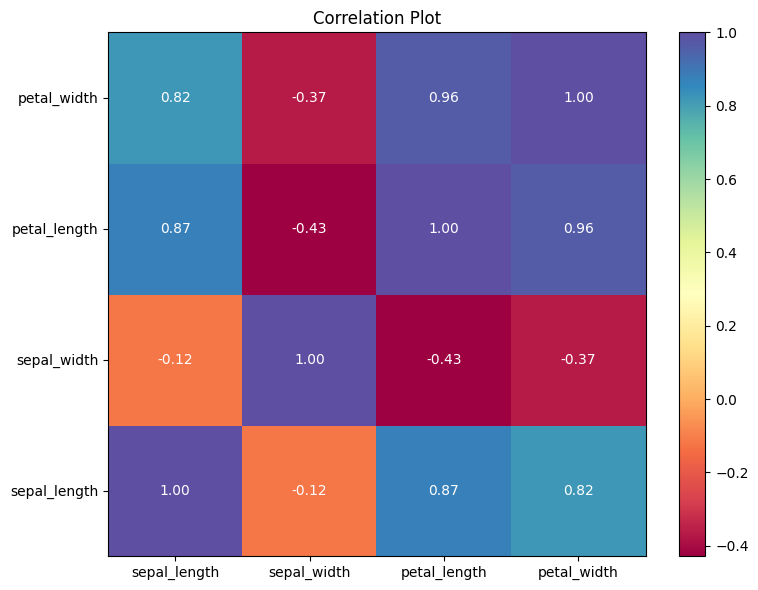

In [40]:
# YOUR CODE HERE
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))

heatmap = plt.pcolor(corr, cmap='Spectral')
plt.colorbar(heatmap)

for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        column = corr.columns[i]
        index = corr.index[j]
        value = corr.loc[index, column]
        plt.text(j + 0.5, i + 0.5, f'{value:.2f}',
                 ha='center', va='center', color='white')

plt.xticks(np.arange(0.5, len(corr.columns) + 0.5), corr.columns)
plt.yticks(np.arange(0.5, len(corr.index) + 0.5), corr.index)

plt.title('Correlation Plot')
plt.tight_layout()
plt.show()

# YOUR BRIEF ANSWER TO WHAT A CORRELATION PLOT MEANS HERE:
# A correlation plot visualizes the relation between two variables.
# This makes it easier to see how dependant the features are.

# We can see by the correlation plot that petal length and width seem closely
# related in the data, and as such, one could be omitted, as 
# they give roughly the same information

#### ASSIGNMENT f)
- Create a logistic regression classifier to predict new datapoint into correct Iris labels
- Use a train test split of (80/20) 
- Compute the accuracy of the fitted machine learning model and call it `acc`

In [28]:
# YOUR CODE HERE
#
iris_model = skl.linear_model.LogisticRegression(max_iter=1000)

X = iris.data
y = iris.target
splitsize = 0.8
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=splitsize,random_state=42)

iris_model.fit(X_train, y_train)

y_pred = iris_model.predict(X_test)

acc = skl.metrics.accuracy_score(y_test,y_pred)

print(f"Accuracy: {acc:.2f}")
# CODE PROVIDED TO TEST YOUR FITTED MODEL
assert acc >= 0.95, "You haven't reached a high enough accuracy."

Accuracy: 1.00


The final part, which only works for classification tasks, is for us to investigate how well the classifier faired when predicting the new labels. A handy method is a confusion matrix. It compares how many of the actual labels were classified correctly and (importantly) which labels the model made incorrect predictions.

#### ASSIGNMENT g)
- Create a confusion matrix to illustrate how the labels of the actual Iris dataset differ from the predicted labels

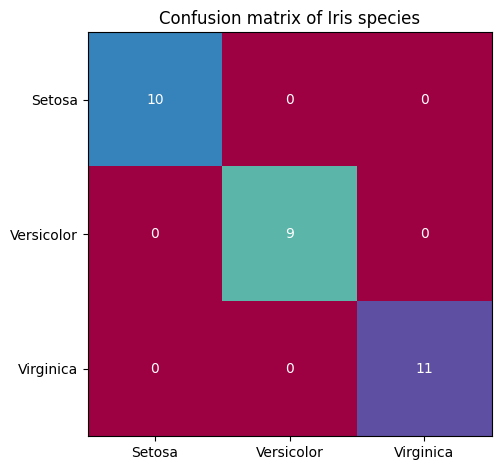

In [29]:
# YOUR CODE HERE
confusion = skl.metrics.confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots()
im = ax.imshow(confusion,cmap="Spectral",)

num = len(iris_target_names)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(num), labels=iris_target_names)
ax.set_yticks(np.arange(num), labels=iris_target_names)

for i in range(num):
    for j in range(num):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion matrix of Iris species")
fig.tight_layout()
plt.show()

# Assignment h)

In an old version of this netbook we used the Boston housing dataset. If you try to import it then you get an error message.


In [30]:
from sklearn import datasets

price = datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Read the error message and look at article by Carlise. What do you think about the ethicial implications of using such a dataset? In the cell below write at least 10 so lines about what you think of using such a dataset and the article by Carlise.  You should change the cell type below to Markdown to write your relections.

# Your reflections
The article highlights the racial bias in the Boston housing dataset.

Simply dropping the "B" column might seem like an easy solution, but it overlooks the historical patterns of racial discrimination and segregation that continue to impact housing dynamics today.

Using the dataset might perpetuate those old harmful biases. 
The article stresses the importance of understanding our data sources and usage. 
Ignoring the warning could mean unknowingly contributing towards discrimination and inequality. 

So, it's up to us to think about the ethics and scrutinize the data in our data sets. 

The article urges us to approach data sets with a keen eye and hopefully boycott ethically questionable datasets. After all, the choices we make today will shape the world we live in tomorrow.

# Where do we go from here?
### Methods for improving model performance even more

We have now trained linear and logistic regression models on two different tasks. These models have had a reasonably good performance. However, we can improve it in several different ways, which we delve into in the upcoming practical notebooks. Some examples include:  

1. Normalize and clean the data  
2. Compare and use other models such as SVMs, Trees, KNNs, generalized linear models, neural networks, etc.  
3. We can artificially generate more data samples. More training data yields a better performing model
4. We can allow the model to see more validation samples (cross-validation) artificially
5. Measure the model's ability when making predictions. When is it incorrect and in what way (Accuracy, Recall, Precision, F1, and ROC-curves)
5. Certain aspects are more important than others when evaluating a model. Therefore it might be useful to use different evaluation metrics for various tasks